In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

from pbil_weighted import pbil_weighted

In [2]:
data_path = 'data/'

rules = np.loadtxt(data_path + 'ClassificationRules.txt')
ys = np.loadtxt(data_path + 'ImageExpertReduced.txt')
xs = np.loadtxt(data_path + 'ImageRawReduced.txt')

In [3]:
ones = rules == 1
twos = rules == 2
threes = rules == 3

In [4]:
def classification_score(P):
    y1 = P.dot(ones)[:, :, np.newaxis]
    y2 = P.dot(twos)[:, :, np.newaxis]
    y3 = P.dot(threes)[:, :, np.newaxis]
    Ys = np.concatenate([y1, y2, y3], axis=2).argmax(axis=2) + 1
    return (Ys == ys).sum(axis=1).astype(np.float32) / ys.size

In [50]:
num_iter = 1000

t0 = time.time()
s, log, p = pbil_weighted(rules.shape[0], classification_score, 50, .05, .05, .01, 
                          num_iter, sigma=.1, logging=True)
print time.time() - t0

Starting iteration 1 out of 1000...
Current population stats: 	0.844, 	0.851, 	0.858
Starting iteration 2 out of 1000...
Current population stats: 	0.844, 	0.851, 	0.860
Starting iteration 3 out of 1000...
Current population stats: 	0.840, 	0.852, 	0.859
Starting iteration 4 out of 1000...
Current population stats: 	0.844, 	0.852, 	0.862
Starting iteration 5 out of 1000...
Current population stats: 	0.845, 	0.852, 	0.860
Starting iteration 6 out of 1000...
Current population stats: 	0.845, 	0.853, 	0.861
Starting iteration 7 out of 1000...
Current population stats: 	0.844, 	0.854, 	0.861
Starting iteration 8 out of 1000...
Current population stats: 	0.844, 	0.854, 	0.861
Starting iteration 9 out of 1000...
Current population stats: 	0.845, 	0.855, 	0.861
Starting iteration 10 out of 1000...
Current population stats: 	0.848, 	0.855, 	0.863
Starting iteration 11 out of 1000...
Current population stats: 	0.846, 	0.854, 	0.861
Starting iteration 12 out of 1000...
Current population stats: 

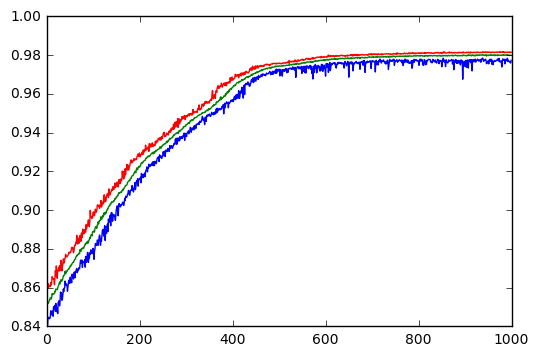

In [51]:
plt.plot(xrange(num_iter), log)
plt.show()